# Capstone Project: Problem Statement

Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks. 

As expected, store sales are influenced by many factors, including promotional campaigns, competition, state holidays, seasonality, and locality.

With thousands of individual managers predicting sales based on their unique circumstances and intuitions, the accuracy of the forecasts is quite varied. To overcome this problem, we are tasked to work on the forecasting problem. As part of this project, we will be building a forecasting model to forecast the daily sales for the next six weeks.

## Different Steps involved in the project are as follows:

1. Reading and understanding the data
2. EDA: Univariate, Bivariate & Multivariate analysis. 
3. Feature Engineering
4. Time Series Analysis: Modelling & Forecasting.

## 1. Reading and understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('/Users/saisharan/Downloads/Dataset/train.csv')
df_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
df_store=pd.read_csv('/Users/saisharan/Downloads/Dataset/store.csv')
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### CompetitionDistance field has insignificant no. of null values, we will impute it with its mean

In [7]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].mean(), inplace=True)

Absence of promo values would mean that there are no promotions running on the store, we can impute that with zero

As the other two columns has null/NaN values, it means the activity/instance is not done/present. We can replace the null values with zero. 

1. CompetitionOpenSinceMonth    (354)
2. CompetitionOpenSinceYear     (354)
3. Promo2SinceWeek              (544)
4. Promo2SinceYear              (544)
5. PromoInterval                (544)

In [8]:
df_store.fillna('0', inplace=True)

In [9]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   object 
 5   CompetitionOpenSinceYear   1115 non-null   object 
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   object 
 8   Promo2SinceYear            1115 non-null   object 
 9   PromoInterval              1115 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 87.2+ KB


In [10]:
df_store.head().append(df_store.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0,0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0,0,0
4,5,a,a,29910.0,4.0,2015.0,0,0,0,0
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0,0,0
1112,1113,a,c,9260.0,0,0,0,0,0,0
1113,1114,a,c,870.0,0,0,0,0,0,0
1114,1115,d,c,5350.0,0,0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [11]:
df = df_train.merge(right=df_store, on='Store', how='outer')

In [12]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  object 
 13  CompetitionO

In [14]:
df.CompetitionOpenSinceMonth.astype('int')
df.CompetitionOpenSinceYear.astype('int')
df.Promo2SinceWeek.astype('int')
df.Promo2SinceYear.astype('int')

0             0
1             0
2             0
3             0
4             0
           ... 
1017204    2012
1017205    2012
1017206    2012
1017207    2012
1017208    2012
Name: Promo2SinceYear, Length: 1017209, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  object 
 13  CompetitionO

## 2. EDA: Univariate, Bivariate & Multivariate analysis. 

### Univariate Analysis

### Catagorical Variables

In [16]:
# Creating function for plots

def CountPlot(features,df):
    cols=4
    rows = len(features)//cols +1
    fig = plt.figure(figsize=(16, rows*5))
    dataframe = df.copy()
    for plot, feature in enumerate(features):
        fig.add_subplot(rows,cols,plot+1)
        fig.tight_layout(h_pad=5, w_pad=5)
        dataframe[feature] = dataframe[feature].fillna('Missing')
        ax = sns.countplot(x=feature, data=dataframe,order = dataframe[feature].value_counts().index)
        plt.xticks(rotation = 90)
        plt.title("for {}".format(feature))
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(dataframe) * 100),
                    ha="center")

In [17]:
# Data categorical fields

categorical_fields=['StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval', 'DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


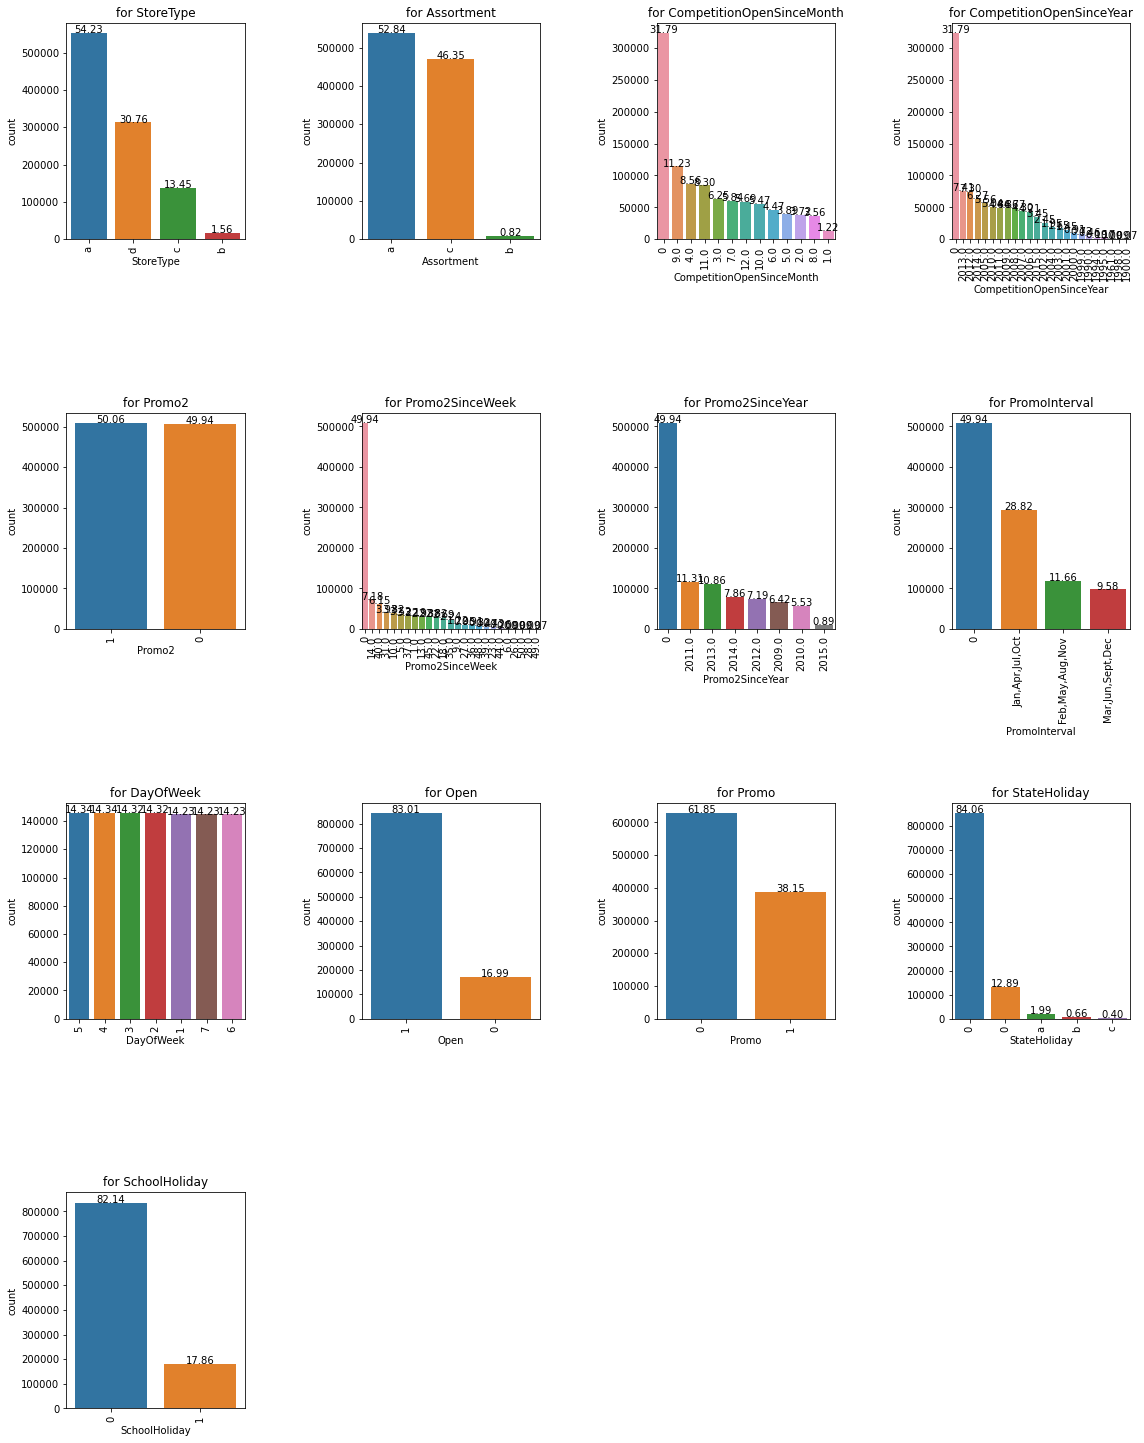

In [18]:
# Count plots for the catagorical data

CountPlot(categorical_fields,df)

#### Inferences on data

1. Majority of the stores, almost 54% are type A stores.
2. Majority of the stores have type A of the assortments, other type of assortments are low.
3. Data for Competition is Null for 31% of the stores, meaning there is either no competition for those stores or the data is missing.
4. 49% of the stores do not have promotions; Promo2 in the store.
5. Promotions are concentrated in months of Jan, Apr, Jul, Oct months.
6. All days of the week have equal contribution.
7. Stores are closed on only 17% data points.
8. Promotions are active on only 38% records.



### Numerical Variables

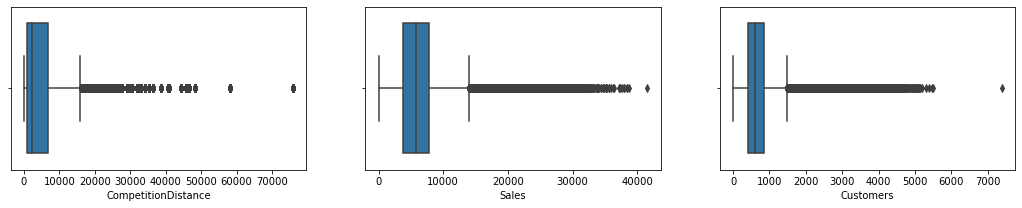

In [19]:
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.boxplot(x = 'CompetitionDistance', data = df)

plt.subplot(1,3,2)
sns.boxplot(x = 'Sales', data = df)

plt.subplot(1,3,3)
sns.boxplot(x = 'Customers',data = df)

plt.show()

The above all 3 plots shows that there are outliers. Let's cap them at 99%ile.

In [20]:
# Capping values of CompetitionDistance to 99th %ile

df.loc[df.CompetitionDistance>df.CompetitionDistance.quantile(.99),'CompetitionDistance']=df.CompetitionDistance.quantile(.99)
df.loc[df.Sales>df.Sales.quantile(.99),'Sales']=df.Sales.quantile(.99)
df.loc[df.Customers>df.Customers.quantile(.99),'Customers']=df.Customers.quantile(.99)

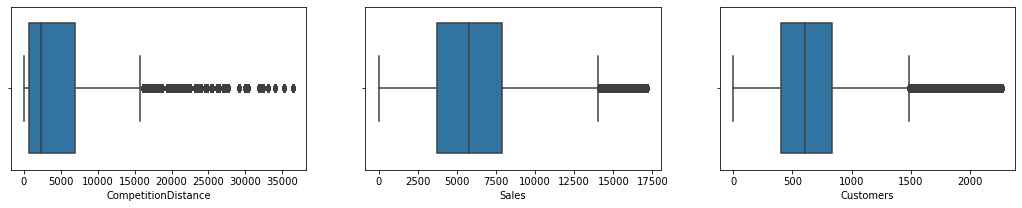

In [21]:
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.boxplot(x = 'CompetitionDistance', data = df)

plt.subplot(1,3,2)
sns.boxplot(x = 'Sales', data = df)

plt.subplot(1,3,3)
sns.boxplot(x = 'Customers',data = df)

plt.show()

#### The outliers has been capped to 99th %ile.

## Bivariate Analysis

#### Boxplots of attributes against Sales

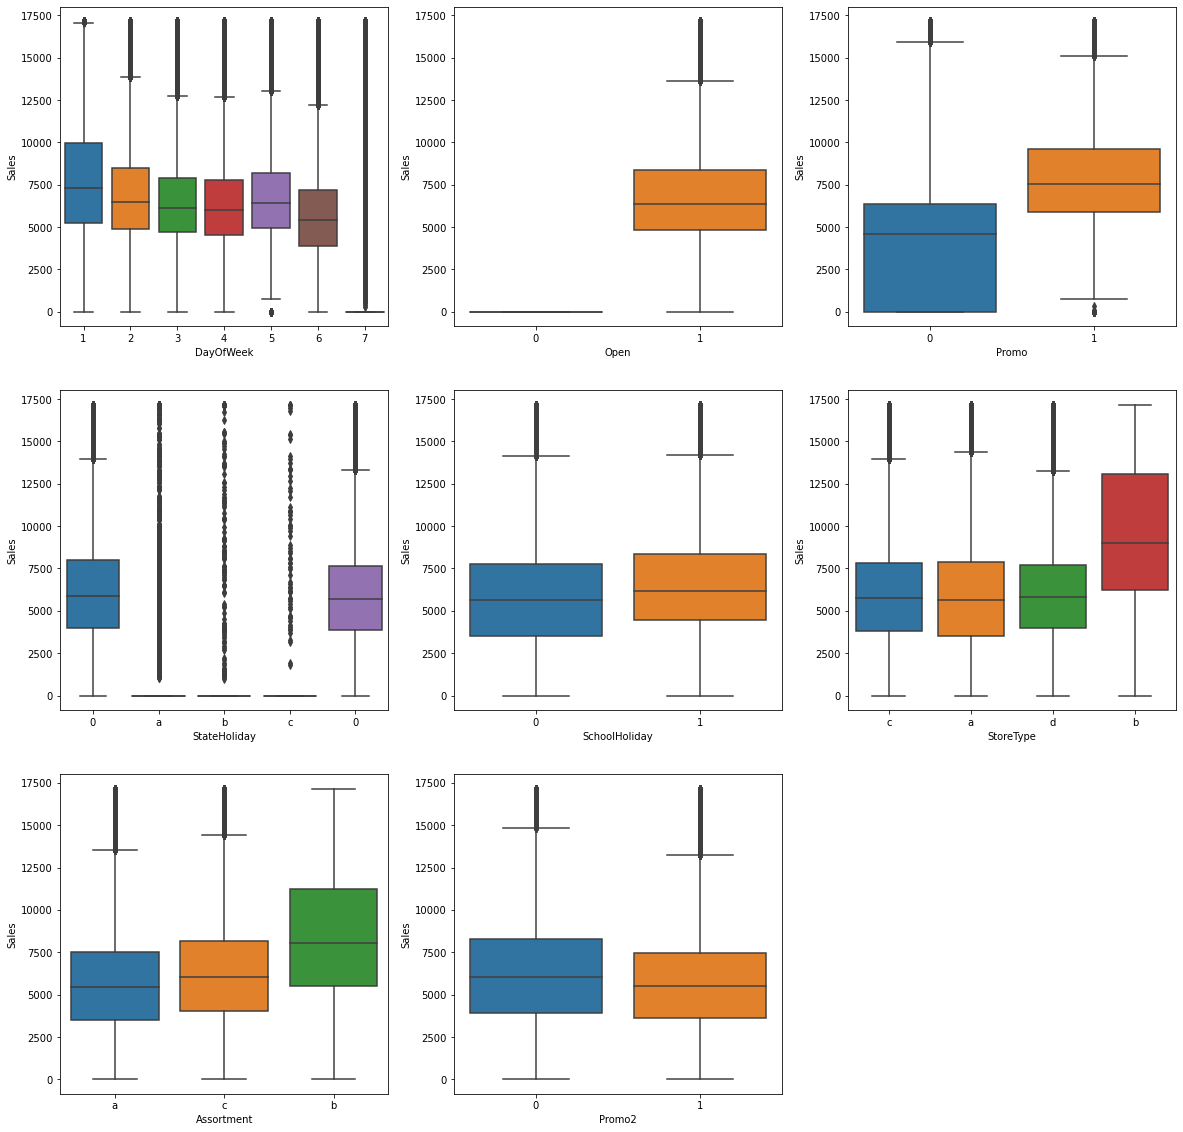

In [22]:
# Boxplots of attributes against Sales

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'DayOfWeek', y = 'Sales', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Open', y = 'Sales', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Promo', y = 'Sales', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'StateHoliday', y = 'Sales', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'StoreType', y = 'Sales', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'Assortment', y = 'Sales', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'Promo2', y = 'Sales', data = df)
plt.show()

### Inferences from the above plots

1. Sales are higher on 1st, 2nd and 5th weekdays. Sales are very low on 7th weekday.
2. Sales are higher when promotion is 1
3. On state holidays, a, b and c, sales are low
4. School holidays do not seem to impact sales
5. Store type B has higher % of sales than other store types
6. Assortment type B has higher sales
7. Promo2 does not seem to have much contribution to sales

## Sactterplot Analysis

#### Scatterplots of attributes customers & CompetitionDistance against Sales

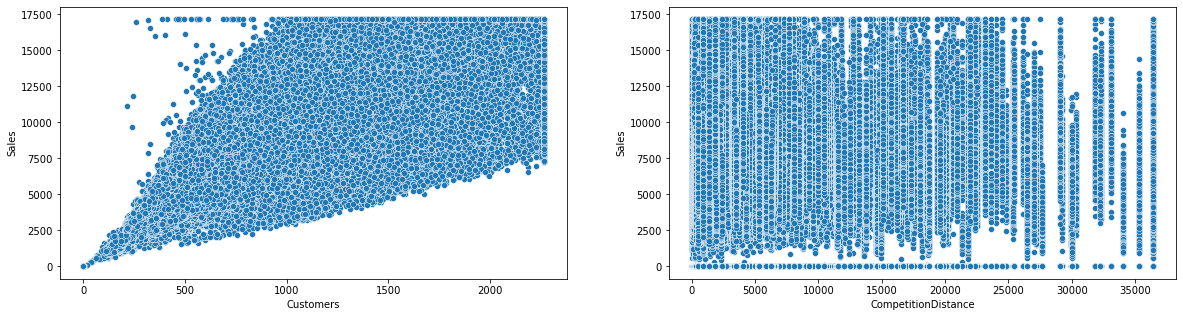

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(x = 'Customers', y = 'Sales', data = df)
plt.subplot(1,2,2)
sns.scatterplot(x = 'CompetitionDistance', y = 'Sales', data = df)
plt.show()

### Inferences from the above plots

1. Increase in number of customers correlates an increase in sales
2. Competition does not seem to have any correlations against sales

## Multivariate Analysis

### For categorical variables

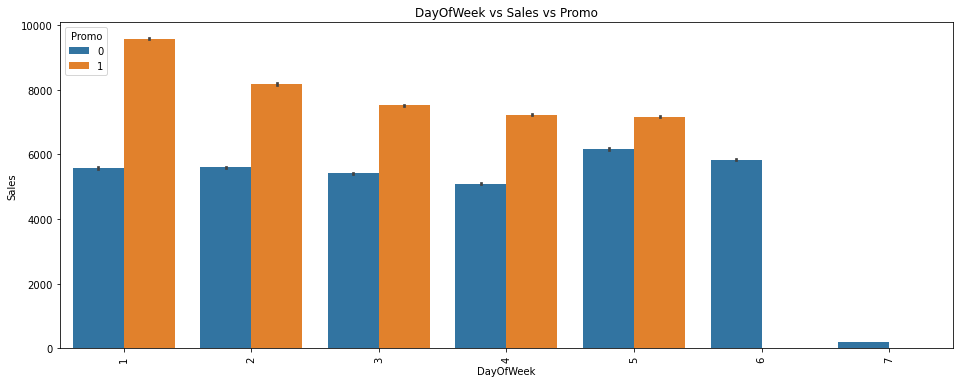

In [24]:
# Checking co-relation between Sales vs Days vs Promo

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='Promo',data=df)
plt.title("DayOfWeek vs Sales vs Promo")
plt.xticks(rotation = 90)
plt.show()

Promotion has a strong co-relation with sales of the stores.


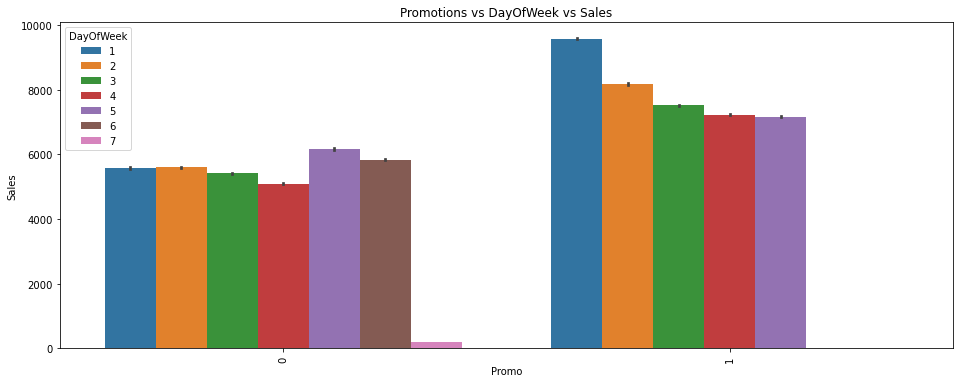

In [25]:
# Checking co-relation between Promo vs Days

plt.figure(figsize=(16, 6))
sns.barplot(x='Promo',y='Sales',hue='DayOfWeek',data=df)
plt.title("Promotions vs DayOfWeek vs Sales")
plt.xticks(rotation = 90)
plt.show()

Days at the start of the week are higher Sales than sales of other days


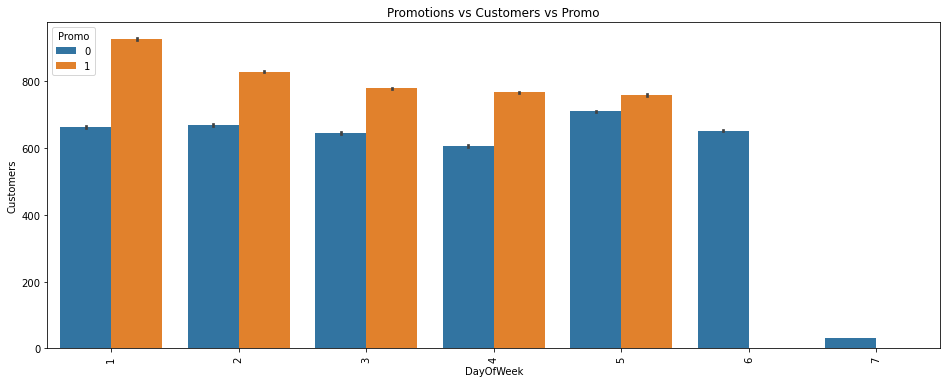

In [26]:
# Checking co-relation between Days vs Customers vs Promo 

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Customers',hue='Promo',data=df)
plt.title("Promotions vs Customers vs Promo")
plt.xticks(rotation = 90)
plt.show()

Customers are higher when promotios are active


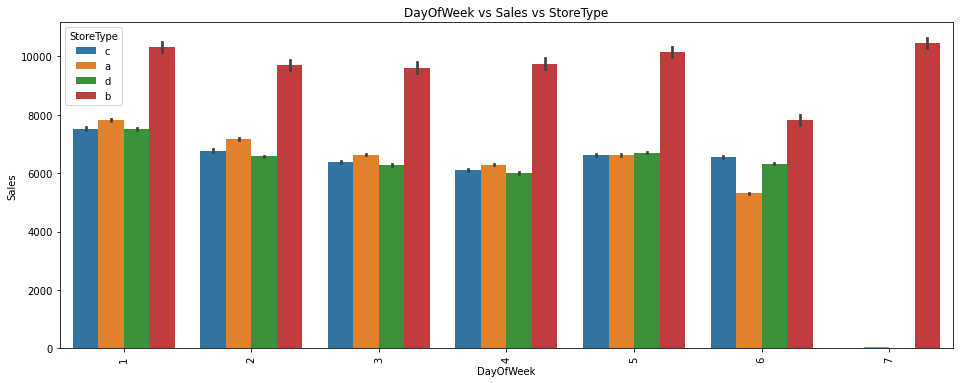

In [27]:
# Checking co-relation between Days vs Sales vs StoreType 

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='StoreType',data=df)
plt.title("DayOfWeek vs Sales vs StoreType")
plt.xticks(rotation = 90)
plt.show()

##### Sales for store type b is the highest among all days including day 7 where sales for other store type is almost zero. On day 6, the difference in sales among store type is marginally lower than other days

### For Numerical Variable

<Figure size 4320x2880 with 0 Axes>

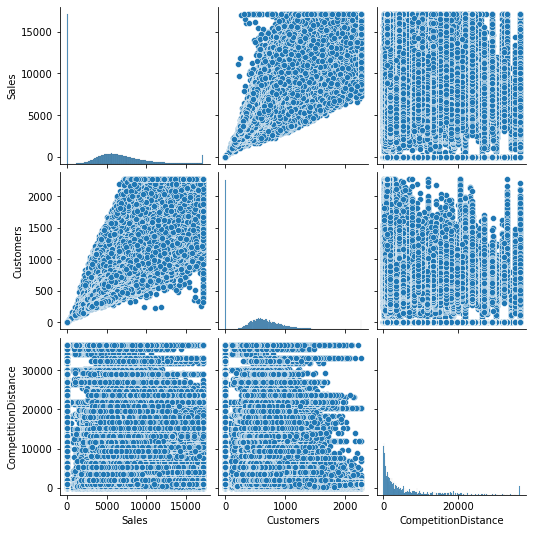

In [28]:
# Pairwise plot

plt.figure(figsize=(60, 40))
sns.pairplot(df[['Sales','Customers','CompetitionDistance']])
plt.show()

#### From the plot, we can see that as customers increase, sales also increases.


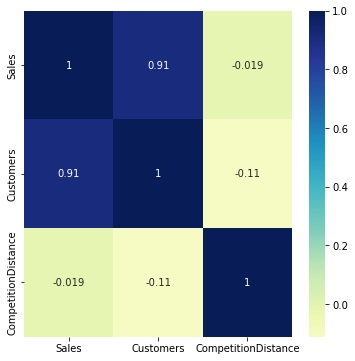

In [29]:
# Checking co-relation coefficients for numercial variables

# plot heat map for corr
cor = df[['Sales','Customers','CompetitionDistance']].corr()
plt.figure(figsize = (6, 6))
sns.heatmap(cor, annot = True,center=0.4,cmap="YlGnBu")
plt.show()

##### Sales and customer have a very strong co-relation with a factor of 0.89. For other variables, it is insignificant.


## 3. Feature Engineering


### Creating Dummy Variables

In [30]:
# Creating dummy variable for day of the week 

dummies=pd.get_dummies(df['DayOfWeek'],drop_first=True,prefix='DayOfWeek')
df=pd.concat([df,dummies],axis=1)

# Creating dummy variable for StoreType 

dummies=pd.get_dummies(df['StoreType'],drop_first=True,prefix='StoreType')
df=pd.concat([df,dummies],axis=1)

# Creating dummy variable for Assortment 

dummies=pd.get_dummies(df['Assortment'],drop_first=True,prefix='Assortment')
df=pd.concat([df,dummies],axis=1)

# Viewing data

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,1,0,0,0,1,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,1,0,0,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1,0,0,0,0,0,1,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0


In [31]:
# Dropping DayofWeek, StoreType and Assortment

df.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)
df.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0


#### We had seen earlier that Promo2 variables does not seem to have much impact on Sales, we can drop them

In [32]:
df.drop(['Promo2','Promo2SinceWeek','Promo2SinceYear','Promo2SinceYear'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  object 
 10  CompetitionOpenSinceYear   1017209 non-null  object 
 11  PromoInterval              1017209 non-null  object 
 12  DayOfWeek_2                1017209 non-null  uint8  
 13  DayOfWeek_3 

### Let us check if the compition data has an effect on the sales.

#### for us to do that, first lets combine the CompetitionOpenSinceMonth & CompetitionOpenSinceYear into single coloumn. 

In [33]:
df['CompetitionOpenSince'] = df.CompetitionOpenSinceYear.astype(int).astype(str) + '-' + df.CompetitionOpenSinceMonth.astype(int).astype(str) + '-01'
df.CompetitionOpenSince

0          2008-9-01
1          2008-9-01
2          2008-9-01
3          2008-9-01
4          2008-9-01
             ...    
1017204       0-0-01
1017205       0-0-01
1017206       0-0-01
1017207       0-0-01
1017208       0-0-01
Name: CompetitionOpenSince, Length: 1017209, dtype: object

#### Date and CompetitionOpenSince are date objects, we need convert them into datetime objects


In [34]:
#Converting date field to datetime object

df.Date=pd.to_datetime(df['Date'],errors='coerce')

#Converting CompetitionOpenSince field to datetime object

df['CompetitionOpenSince']=pd.to_datetime(df['CompetitionOpenSince'],errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   Date                       1017209 non-null  datetime64[ns]
 2   Sales                      1017209 non-null  int64         
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   CompetitionDistance        1017209 non-null  float64       
 9   CompetitionOpenSinceMonth  1017209 non-null  object        
 10  CompetitionOpenSinceYear   1017209 non-null  object        
 11  PromoInterval              1017209 no

#### There will be store transaction dates where sales were made before competition started and sales after competition. Let's create a new flag for their identification

##### After that let's see if there is any impact of it.

In [35]:
def calculate_compitition(row):
    if row.CompetitionOpenSince>row.Date:
        return 1
    else:
        return 0
df['Before_Competition']=df[['CompetitionOpenSince','Date']].apply(calculate_compitition,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   Date                       1017209 non-null  datetime64[ns]
 2   Sales                      1017209 non-null  int64         
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   CompetitionDistance        1017209 non-null  float64       
 9   CompetitionOpenSinceMonth  1017209 non-null  object        
 10  CompetitionOpenSinceYear   1017209 non-null  object        
 11  PromoInterval              1017209 no

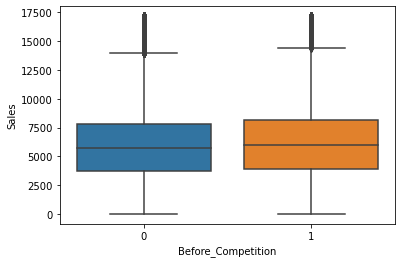

In [36]:

sns.boxplot(x = 'Before_Competition', y = 'Sales', data = df)
plt.show()

### Sales of stores before and after competition do not have much difference, we can drop this field


##### Now, we can drop CompetitionOpenSince, since it is a field for derived Before_Competition. We can also drop CompetitionOpenSinceMonth & CompetitionOpenSinceYear. Let's do it.


In [37]:
df.drop(['Before_Competition', 'CompetitionOpenSince', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'],inplace=True,axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  int64         
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday         1017209 non-null  object        
 7   SchoolHoliday        1017209 non-null  int64         
 8   CompetitionDistance  1017209 non-null  float64       
 9   PromoInterval        1017209 non-null  object        
 10  DayOfWeek_2          1017209 non-null  uint8         
 11  DayOfWeek_3          1017209 non-null  uint8         
 12  DayOfWeek_4          1017209 non-null  uint8         
 1

## 4. Time Series Analysis: Modelling & Forecasting.

In [39]:
#Setting date as index

df=df.set_index('Date')
df.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,1,0,1,1270.0,0,0,0,0,1,0,0,0,1,0,0,0
2015-07-30,1,5020,546,1,1,0,1,1270.0,0,0,0,1,0,0,0,0,1,0,0,0
2015-07-29,1,4782,523,1,1,0,1,1270.0,0,0,1,0,0,0,0,0,1,0,0,0
2015-07-28,1,5011,560,1,1,0,1,1270.0,0,1,0,0,0,0,0,0,1,0,0,0
2015-07-27,1,6102,612,1,1,0,1,1270.0,0,0,0,0,0,0,0,0,1,0,0,0


### Lets filter the data from the dataset(df)

#### Since the company is just embarking on this project, the scope has been kept to nine key stores across Europe. The stores are key for the company keeping in mind the revenue and historical prestige associated with them. These stores are numbered - 1,3,8,9,13,25,29,31 and 46.

In [40]:
df=pd.concat([df[df.Store==1],df[df.Store==3], df[df.Store==8], df[df.Store==9], df[df.Store==13], df[df.Store==25], df[df.Store==29], df[df.Store==31], df[df.Store==46]])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8110 entries, 2015-07-31 to 2013-01-01
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                8110 non-null   int64  
 1   Sales                8110 non-null   int64  
 2   Customers            8110 non-null   int64  
 3   Open                 8110 non-null   int64  
 4   Promo                8110 non-null   int64  
 5   StateHoliday         8110 non-null   object 
 6   SchoolHoliday        8110 non-null   int64  
 7   CompetitionDistance  8110 non-null   float64
 8   PromoInterval        8110 non-null   object 
 9   DayOfWeek_2          8110 non-null   uint8  
 10  DayOfWeek_3          8110 non-null   uint8  
 11  DayOfWeek_4          8110 non-null   uint8  
 12  DayOfWeek_5          8110 non-null   uint8  
 13  DayOfWeek_6          8110 non-null   uint8  
 14  DayOfWeek_7          8110 non-null   uint8  
 15  StoreType_b         

#### For a given date, we have we have the data from multiple stores. For ease of analysis, let's aggregate the data Date-wise. 

In [42]:
# Grouping the data at a date level for analysis

df_all=df.groupby('Date').agg({'Sales': 'mean',
                                           'Customers':'mean', 
                                           'Promo': 'sum',
                                           'SchoolHoliday':'sum',
                                           'DayOfWeek_2':'mean',
                                           'DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean',
                                           'DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean',
                                           'DayOfWeek_7':'mean', 
                                           'StoreType_b':'mean', 
                                            'StoreType_c':'mean', 
                                            'StoreType_d':'mean',
                                           'Assortment_b':'mean',
                                           'Assortment_c':'mean'})
df_all.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.333333
2013-01-02,5862.555556,707.333333,0,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.333333
2013-01-03,5345.555556,653.333333,0,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.333333
2013-01-04,5407.222222,654.444444,0,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.333333
2013-01-05,5044.666667,606.555556,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.333333,0.0,0.333333


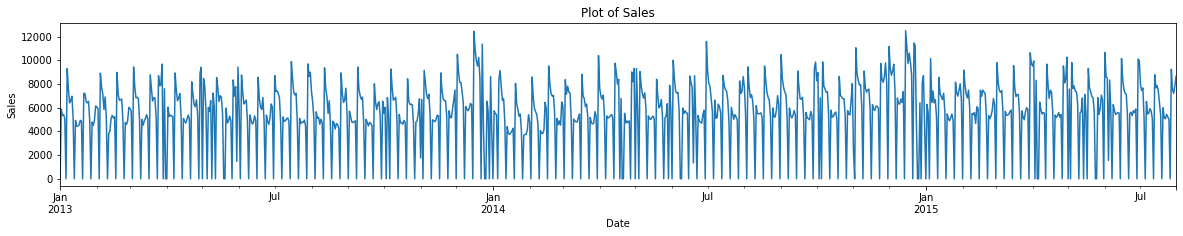

In [43]:
plt.figure(figsize=(20, 3))
df_all.Sales.plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Plot of Sales')
plt.show()

#### Seasonal decomposition of the series.

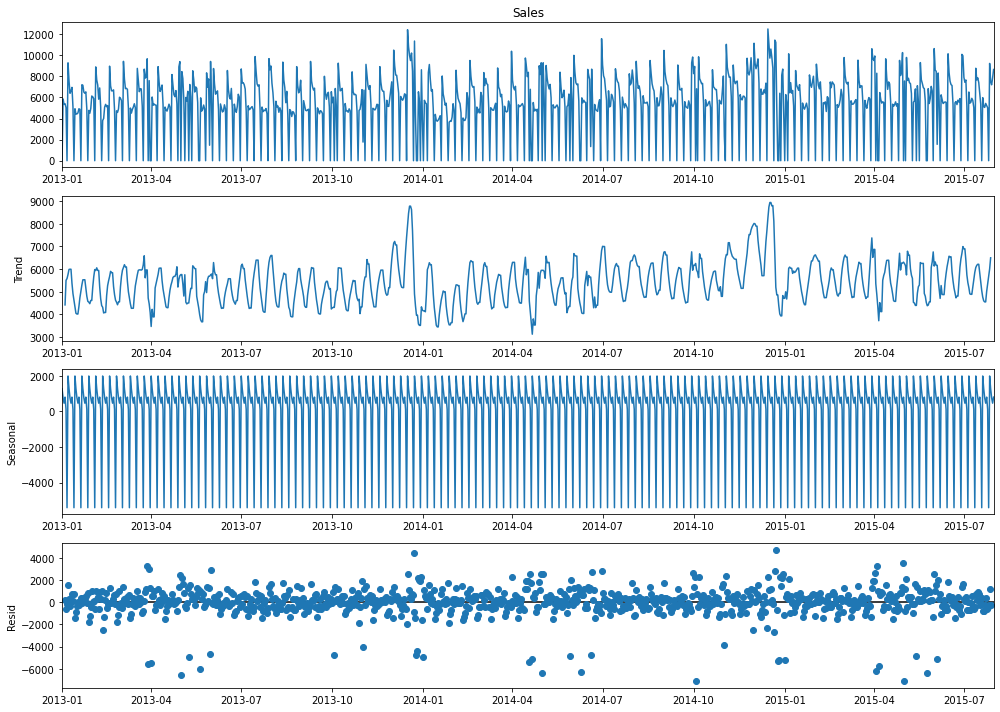

Mean Residual for Sales=0.3261082845056005


In [44]:
import matplotlib as mpl
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose

mpl.rcParams['figure.figsize'] = 14, 10
decomposition = seasonal_decompose(df_all.Sales, model='Additive') # additive seasonal index
fig = decomposition.plot()
plt.show()
print('Mean Residual for {}={}'.format('Sales',decomposition.resid.mean()))

### ADF test for Stationarity

In [45]:
from statsmodels.tsa.stattools import adfuller

def stationary_test(df):
    for c in df.columns:
        print('For ',c)
        print('*'*100)
        r=adfuller(df[c],autolag='AIC')
        print('ADF Statistic=',r[0])
        print('P value=',r[1])
        output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
        p_value = output['pvalue']
        if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")  

In [46]:
stationary_test(df_all[['Sales','Customers']])

For  Sales
****************************************************************************************************
ADF Statistic= -4.624704968707528
P value= 0.00011628294330357106
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.
For  Customers
****************************************************************************************************
ADF Statistic= -4.314491135802244
P value= 0.00041923364204839473
 => P-Value = 0.0004. Rejecting Null Hypothesis.
 => Series is Stationary.


### Lets calculate the Auto-corrolation & Partial Auto corrolation finction

   ### Auto-Corrolation Function

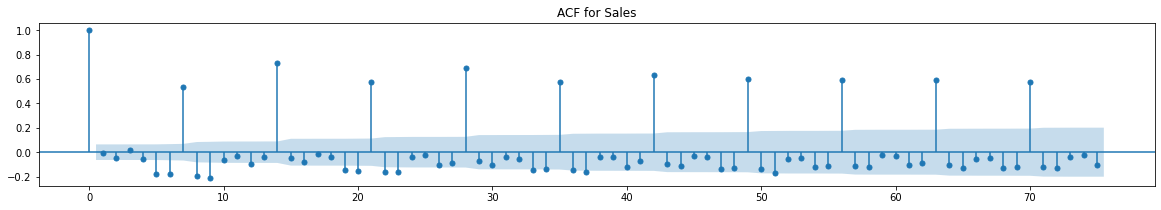

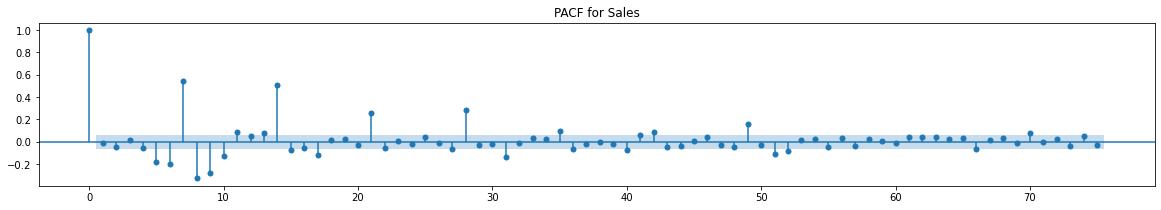

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

mpl.rcParams['figure.figsize'] = 20, 3
fig.add_subplot(2,1,1)
plot_acf(df_all.Sales, lags = 75)
plt.title('ACF for {}'.format('Sales')) 
fig.add_subplot(2,1,2)
plot_pacf(df_all.Sales, lags = 75)
plt.title('PACF for {}'.format('Sales')) 
plt.show()

For ACF, we set q=0 as co-realation never comes down. For PACF, we set p=7, since it is the highest lag since inception.


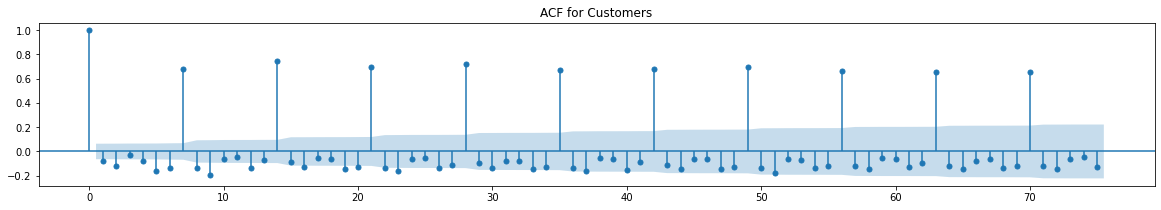

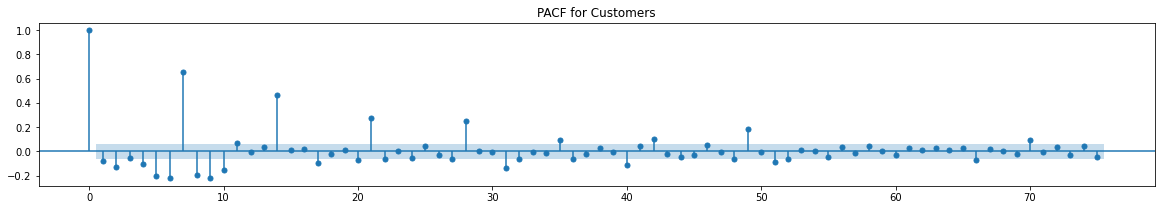

In [48]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

mpl.rcParams['figure.figsize'] = 20, 3
fig.add_subplot(2,1,1)
plot_acf(df_all.Customers, lags = 75)
plt.title('ACF for {}'.format('Customers')) 
fig.add_subplot(2,1,2)
plot_pacf(df_all.Customers, lags = 75)
plt.title('PACF for {}'.format('Customers')) 
plt.show()

For ACF, we set q=0 as co-realation never comes dowm. For PACF, we set p=7, since it is the highest lag since inception.


### Train-Test Split

##### We need to predict sales for the next 6 weeks i.e 42 days. So, we keep 42 days for test and remaining for training.


In [49]:
df_all.shape

(942, 15)

#### We will use first 900 rows for train and last 42 for test


In [50]:
#Creating train and test splits

train_len=900
df_all_train=df_all.iloc[:train_len,:]
df_all_test=df_all.iloc[train_len:,:]

##### Standardising numerical values in train datasets using minmax Scalar


In [51]:
from sklearn.preprocessing import StandardScaler
standardization=StandardScaler()
df_all_train[['Sales','Customers','Promo','SchoolHoliday','StoreType_b','StoreType_c','StoreType_d','Assortment_b','Assortment_c']]=standardization.fit_transform(df_all_train[['Sales','Customers','Promo','SchoolHoliday','StoreType_b','StoreType_c','StoreType_d','Assortment_b','Assortment_c']])
df_all_train.head()


,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,
2013-01-01,-1.886498,-2.027742,-0.78263,2.855851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506935,0.506935,0.0,-0.506935
2013-01-02,0.161245,0.389699,-0.78263,2.855851,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.506935,0.506935,0.0,-0.506935
2013-01-03,-0.019339,0.205144,-0.78263,2.855851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.506935,0.506935,0.0,-0.506935
2013-01-04,0.002200,0.208941,-0.78263,2.855851,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.506935,0.506935,0.0,-0.506935
2013-01-05,-0.124437,0.045272,-0.78263,-0.174230,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.506935,0.506935,0.0,-0.506935


##### Standardising numerical values in test datasets using minmax Scalar

In [52]:
## Transform on the test data.

df_all_test[['Sales','Customers','Promo','SchoolHoliday', 'StoreType_b','StoreType_c','StoreType_d','Assortment_b','Assortment_c']]=standardization.transform(df_all_test[['Sales','Customers','Promo','SchoolHoliday', 'StoreType_b','StoreType_c','StoreType_d','Assortment_b','Assortment_c']])
df_all_test.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,
2015-06-20,-0.015963,-0.009411,-0.78263,-0.55299,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.506935,0.506935,0.0,-0.506935
2015-06-21,-1.886498,-2.027742,-0.78263,-0.55299,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.506935,0.506935,0.0,-0.506935
2015-06-22,0.036431,0.127676,-0.78263,-0.55299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506935,0.506935,0.0,-0.506935
2015-06-23,0.075940,0.178182,-0.78263,-0.55299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506935,0.506935,0.0,-0.506935
2015-06-24,-0.025976,0.066158,-0.78263,-0.55299,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.506935,0.506935,0.0,-0.506935


### Modelling:VAR [Vector AutoRegressive Model]

In [53]:
import statsmodels as sm
from statsmodels.tsa.vector_ar.var_model import VAR

exog =df_all_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog =df_all_train[['Sales', 'Customers']].astype(float)
var_model = sm.tsa.vector_ar.var_model.VAR(endog,exog)
res=var_model.select_order(maxlags=15)
print(res.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -5.662      -5.565    0.003475      -5.625
1       -5.772      -5.653    0.003114      -5.726
2       -5.764      -5.624    0.003137      -5.711
3       -5.813      -5.651    0.002987      -5.751
4       -5.816      -5.632    0.002980      -5.746
5       -5.819      -5.613    0.002972      -5.740
6       -5.834      -5.607    0.002926      -5.747
7       -5.848      -5.599    0.002886      -5.753
8       -5.967      -5.696    0.002563      -5.863
9       -6.010      -5.718    0.002453      -5.899
10      -6.033     -5.720*    0.002397      -5.914
11      -6.044      -5.708    0.002373      -5.915
12      -6.039      -5.682    0.002384      -5.903
13      -6.044      -5.665    0.002373      -5.899
14      -6.076      -5.676    0.002296     -5.923*
15     -6.081*      -5.659   0.002287*      -5.919
-------------------------------

/Users/saisharan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


#### AIC is the lowest at lag 10.

In [54]:
#Fitting the model with lag 10

var_model_final = var_model.fit(10)
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 06, Jun, 2023
Time:                     11:34:09
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.72775
Nobs:                     890.000    HQIC:                  -5.92065
Log likelihood:           220.085    FPE:                 0.00238169
AIC:                     -6.03999    Det(Omega_mle):      0.00223375
--------------------------------------------------------------------
Results for equation Sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.512376         0.111073            4.613           0.000
Promo                 0.376246         0.037291           10.089           0.000
SchoolHoliday        -0.039932         0.017482           -2

## Impulse response function (Sales Vs Customers)

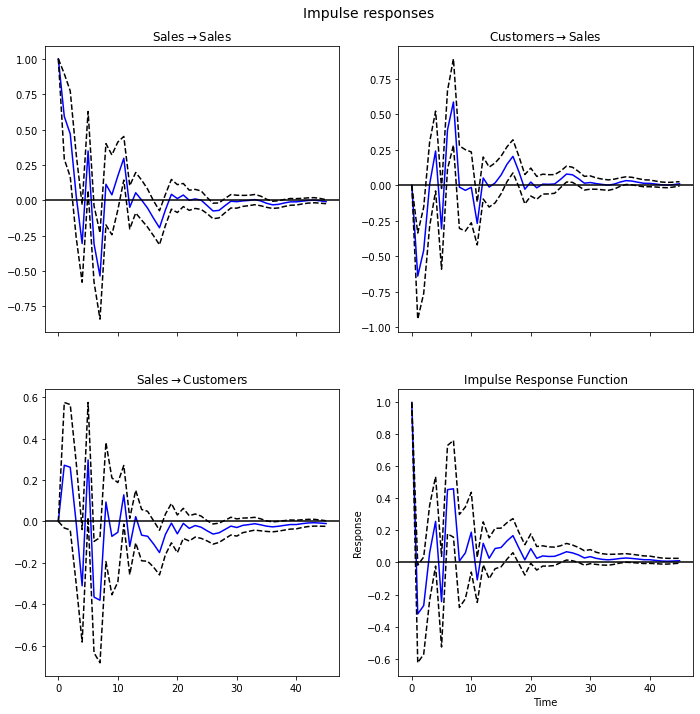

In [55]:
# Plotting the IRF function.

variables=df_all.columns
# Set up the impulse (shock)
impulse = np.zeros((1, len(variables)))

# Calculate the IRF
irf = var_model_final.irf(periods=45)

# Plot the IRF
irf.plot(orth=False)
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Impulse Response Function')
plt.show()

#### Here it takes approximately 40 time periods before the sales revert back to its normal value.

## Cointegration test

##### Perform Johassen test with p=10
##### Creating function for johassen test for checking cointegration

In [56]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

def cointegration_test(df, lag): 
    alpha=0.05
    out = coint_johansen(df,-1,lag)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [57]:
df_all['Sales']=df_all['Sales'].apply(lambda x:round(x))
df_all['Customers']=df_all['Customers'].apply(lambda x:round(x))

In [58]:
cointegration_test(df_all[['Sales','Customers']],10)
rank_result=select_coint_rank(df_all[['Sales','Customers']],-1,10)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  202.01    > 12.3212   =>   True
Customers ::  61.25     > 4.1296    =>   True


In [59]:
print(rank_result.rank)

2


##### We have the rank of Johassen test as 2 which means that the time series are stationary but do not seem to be co-integratied


### VAR Model & Forecasting


In [60]:
# Getting lag order

lag_order = var_model_final.k_ar
print(lag_order) 
forecast_input =df_all_train[['Sales','Customers']].values[-lag_order:]
forecast_input

10


array([[ 0.00934144,  0.08362634],
       [ 0.04139867,  0.16527097],
       [ 0.06402502,  0.11818291],
       [ 0.04900547, -0.02004335],
       [-1.88649838, -2.02774175],
       [ 1.65788261,  1.10399434],
       [ 1.04235273,  0.70982166],
       [ 0.75108212,  0.4588119 ],
       [ 0.63775631,  0.44741962],
       [ 0.60600957,  0.43754632]])

In [61]:
exog_test =df_all_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
fc = var_model_final.forecast(y=forecast_input, steps=42,exog_future=exog_test)
var_forecast = pd.DataFrame(fc, index=df_all_test.index, columns=['Sales','Customers'])
var_forecast

,Sales,Customers
Date,,
2015-06-20,0.157319,0.167236
2015-06-21,-1.897339,-2.097381
2015-06-22,0.000374,0.115118
2015-06-23,-0.038859,0.143346
2015-06-24,-0.221742,-0.065126
2015-06-25,-0.300713,-0.145717
2015-06-26,0.023722,0.122630
2015-06-27,0.038074,0.042802
2015-06-28,-1.834716,-2.041456


In [62]:
#Adding forecasted values to the dataframe

df_all_test['VarForecastedSales']=var_forecast.Sales
df_all_test['VarForecastedCustomers']=var_forecast.Customers

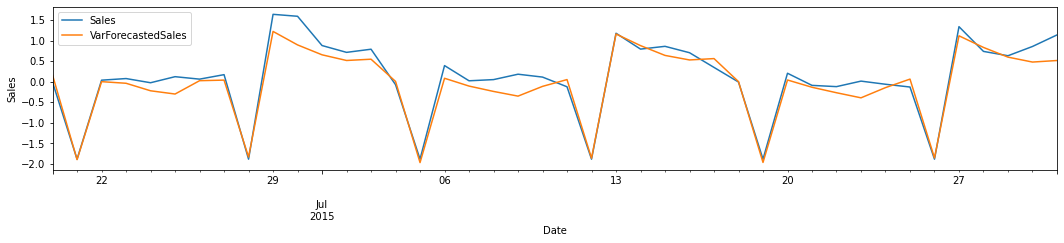

In [63]:
plt.figure(figsize=(18, 3))
df_all_test.Sales.plot()
df_all_test.VarForecastedSales.plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

### Storing results in a dataframe


In [64]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [65]:
from sklearn.metrics import mean_squared_error
summary_df=pd.DataFrame(columns=['Store','Model','RMSE_SALES','MAPE_SALES','RMSE_CUSTOMERS','MAPE_CUSTOMERS'])

def summary(s,fs,c,fc,store,model):
    rmse_sales = np.sqrt(mean_squared_error(s, fs)).round(2)
    mape_sales = np.round(np.mean(np.abs(s-fs)/s)*100,2)
    rmse_customers = np.sqrt(mean_squared_error(c, fc)).round(2)
    mape_customers = np.round(np.mean(np.abs(c-fc)/c)*100,2)
    temp=pd.DataFrame({'Store':[store],'Model':[model], 'RMSE_SALES': [rmse_sales],'MAPE_SALES': [mape_sales] , 
                            'RMSE_CUSTOMERS': [rmse_customers],'MAPE_CUSTOMERS': [mape_customers]})
    return temp


In [66]:
d=summary(df_all_test['Sales'], df_all_test['VarForecastedSales'],
       df_all_test['Customers'], df_all_test['VarForecastedCustomers'],'All','VAR')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.25,78.94,0.16,-19.1


### Modelling: VARMAX Model & Forecasting

##### We had used q=0 and p=7 for VAR

In [67]:
#modelling
import statsmodels as sm
from statsmodels.tsa.statespace.varmax import VARMAX

exog =df_all_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog =df_all_train[['Sales', 'Customers']].astype(float)
varmax_model = sm.tsa.statespace.varmax.VARMAX(endog, order=(7,0),  exog=exog)
varmax_model_fit = varmax_model.fit(maxiter=1000, disp=False)
print(varmax_model_fit.summary())


/Users/saisharan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/saisharan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                 119.032
                              + intercept   AIC                           -140.065
Date:                    Tue, 06 Jun 2023   BIC                             95.253
Time:                            11:36:53   HQIC                           -50.172
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            3.92, 29.68   Jarque-Bera (JB):      3818.69, 664.09
Prob(Q):                        0.05, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.67, 1.37   Skew:                     -1.73, -1.11
P

In [68]:
#forecasting on test data

exog_test =df_all_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog_test=df_all_test[['Sales','Customers']]
varmax_fc = varmax_model_fit.predict(start=df_all_test.index.min(),end=df_all_test.index.max(),exog=exog_test)
varmax_forecast = pd.DataFrame(varmax_fc, index=df_all_test.index, columns=['Sales','Customers'])
varmax_forecast.head()

,Sales,Customers
Date,,
2015-06-20,0.132157,0.162301
2015-06-21,-1.954402,-2.121159
2015-06-22,0.140098,0.207067
2015-06-23,-0.090419,0.099238
2015-06-24,-0.299172,-0.097663


In [69]:
#Adding forecasted values

df_all_test['VarmaxForecastedSales']=varmax_forecast.Sales
df_all_test['VarmaxForecastedCustomers']=varmax_forecast.Customers

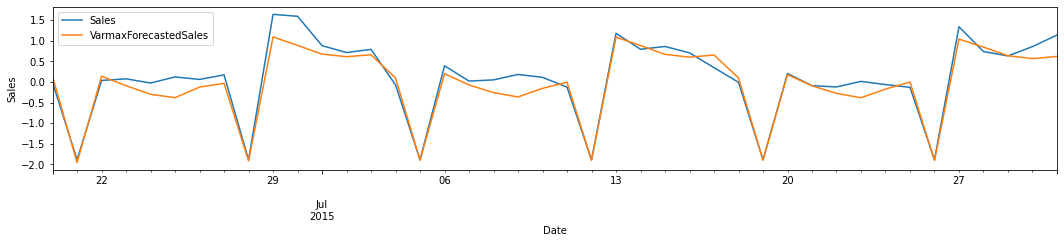

In [70]:
plt.figure(figsize=(18, 3))
df_all_test.Sales.plot()
df_all_test.VarmaxForecastedSales.plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [71]:
#Printing results

d=summary(df_all_test['Sales'], df_all_test['VarmaxForecastedSales'],
       df_all_test['Customers'], df_all_test['VarmaxForecastedCustomers'],'All','VARMAX')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.25,78.94,0.16,-19.10
0,All,VARMAX,0.25,56.51,0.16,-13.97


### From the forecasted output provided, we can draw the following inferences:

The analysis compares two models, VAR (Vector Autoregressive) and VARMAX (Vector Autoregressive Moving Average with Exogenous Variables). The evaluation metrics RMSE_SALES and MAPE_SALES are used to assess the performance of both models in terms of sales forecasting.

#### 1. Sales Forecasting: 

- RMSE (Root Mean Squared Error): The RMSE_SALES values for both models are the same, with a value of 0.25. RMSE measures the average magnitude of the forecast errors, with lower values indicating better accuracy. Since the RMSE is the same for both models, we cannot conclude that one model outperforms the other solely based on this metric.

- MAPE (Mean Absolute Percentage Error): The MAPE_SALES values for VARMAX (56.51) and VAR (78.94) differ. MAPE represents the average percentage difference between the forecasted and actual values, with lower values indicating better accuracy. 

In this case, the VARMAX model has a lower MAPE_SALES, suggesting it performs better in terms of sales forecasting compared to the VAR model.

#### 2. Customer Forecasting: 

- The analysis also includes RMSE_CUSTOMERS and MAPE_CUSTOMERS metrics, which measure the performance of the models in forecasting customer numbers. Both models have the same RMSE_CUSTOMERS value of 0.16. However, the VARMAX model has a lower MAPE_CUSTOMERS value (-13.97) compared to the VAR model (-19.10), indicating better accuracy in customer forecasting for VARMAX.

##### Based on the forecasting results for the selected stores, the VARMAX model seems to provide better accuracy in both sales and customer forecasting, as indicated by the lower MAPE values. 